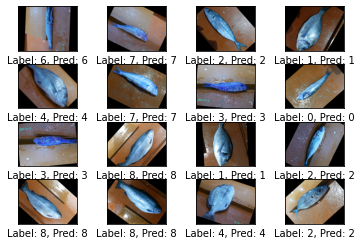

In [34]:
import cv2
import math
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.test.gpu_device_name()
from google.colab import drive
import os
from sklearn.preprocessing import LabelBinarizer

drive.mount('/content/gdrive')


!unzip /content/gdrive/MyDrive/fishdata1.zip            

files=os.listdir("fishdata1/train")
!ls
img_arr=[]
categories = []
for file in files:
    category = file.split('.')[0]
    if category == 'Black Sea Sprat':
        categories.append(str(0))
    if category =='Gilt-Head Bream':
        categories.append(str(1))
    if category == 'Hourse Mackerel':
        categories.append(str(2))
    if category =='Red Mullet' :
        categories.append(str(3))
    if category == 'Red Sea Bream':
        categories.append(str(4))
    if category =='Sea Bass' :
        categories.append(str(5))
    if category == 'Shrimp':
        categories.append(str(6))
    if category =='Striped Red Mullet' :
        categories.append(str(7))
    if category == 'Trout':
        categories.append(str(8))
    img=cv2.imread('fishdata1/train/'+file)
    img_arr.append(img)

def plot_cnn_images(image_set, orig, pred=None):
    assert len(image_set) == len(orig) == 16
    
    # Creating figure with 4x4 sub-plots.
    fig, axes = plt.subplots(4, 4)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(image_set[i], cmap='binary')

        # Show true and predicted classes.
        if pred is None:
            xlabel = "Label: {0}".format(orig[i])
        else:
            xlabel = "Label: {0}, Pred: {1}".format(orig[i], pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

print(categories)
print(img_arr)

training_set, test_set, train_labels, test_labels = train_test_split(img_arr, categories, test_size = .2, random_state = 30)


label_bin = LabelBinarizer().fit(train_labels)
y_train = label_bin.transform(train_labels)
y_test = label_bin.transform(test_labels)
plot_cnn_images(training_set[:16], train_labels[:16])

img_shape = training_set[0].shape
img_size = img_shape[0]
img_size_flat = len(train_imgs[0].ravel())
img_shape = img_shape[:2]
num_classes = 9
num_channels = img_shape[-1]

model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=img_shape),
    # keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer1_conv1'),
    keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer1_conv2'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    # keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128,kernel_size=3, activation="relu", padding="same", name='layer2_conv1'),
    keras.layers.Conv2D(filters=128,kernel_size=3, activation="relu", padding="same", name='layer2_conv2'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    # keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256,kernel_size=3, activation="relu", padding="same", name='layer3_conv1'),
    keras.layers.Conv2D(filters=256,kernel_size=3, activation="relu", padding="same", name='layer3_conv2'),
    keras.layers.Conv2D(filters=256,kernel_size=3, activation="relu", padding="same", name='layer3_conv3'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    # keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer4_conv1'),
    keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer4_conv2'),
    keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer4_conv3'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    # keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer5_conv1'),
    keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer5_conv2'),
    keras.layers.Conv2D(filters=512,kernel_size=3, activation="relu", padding="same", name='layer5_conv3'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')    
  ])
model.summary()


optimizer = tf.keras.optimizers.Adam(lr=5e-4)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x=np.array(training_set), 
        y=y_train,
        epochs=10, batch_size=10)


plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

def plot_test_predict(image_set,pred,test_orig):
     plot_images(images=images[-16:],
                 test_orig=test_orig[-16:],
                 pred=pred[-16:])

loss,accuracy = model.evaluate(x=np.array(testing_set), y=y_test)
print(loss,accuracy)
pred = np.argmax(model.predict(np.array(testing_set)), axis=-1)
integer_map = map(int, test_labels)
integer_list = list(integer_map)
print(pred,np.array(integer_list),result)

plt.plot(accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

plt.plot(result.result['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()


plot_test_predict(test_imgs,pred,np.array(integer_list))
